# Assignment 1: K-Nearest Neighbor (10 marks)

Student Name: **Jason Kang**

Student ID: **995465**

## General info

<b>Due date</b>: Friday, 12 August 2022 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:hasti.samadi@unimelb.edu.au">Hasti Samadi</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 10, and make up 10% of your overall mark for this subject.

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/126693/pages/python-and-jupyter-notebooks?module_item_id=3950453) on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer.If your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (Piazza -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: While you may discuss this homework in general terms with other students, it ultimately is still an individual task. Reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/126693/modules#module_734188">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>

## Overview

In this homework, you'll be applying the K-nearest neighbor (KNN) classification algorithm to a real-world machine learning data set. In particular, we will predict the affordability of a car given a diverse set of features, including the make, engine type, style,  and horsepower and other descriptive properties of the car.

Firstly, you will read in the dataset into a train and a test set, and you will create two feature sets (Q1). Secondly, you will implement different distance functions (Q2). Thirdly, you will implement one KNN classifier (Q3, Q4) and apply it to the data set using different distance functions and parameter K (Q5). Finally, you will assess the quality of your classifier by comparing its class predictions to the gold standard labels (Q6).




# Question 1: Loading the data (0.5 marks)

**Instructions:** For this assignment we will develop a K-Nearest Neighbors (KNN) classifier to predict the 
affordability of cars. The list of classes is:

```
cheap
affordable
expensive
very expensive
```

We use a modified version of the Car data set from the UCI Machine learning repository.

The original data can be found here: https://archive.ics.uci.edu/ml/datasets/Automobile

The dataset consists of 204 instances. Each instance corresponds to a car which has a unique identifier (X; first field) and is characterized with 24 features as described in the file *car.names* which is provided as part of this assignment.

You need to first obtain this dataset, which is on Canvas (assignment 1). The files *car.features* and *car.labels* contain the data we will use in this notebook. Make sure the files are saved in the same folder as this notebook. 

Both files are in comma-separated value format. The first line in each file is a header, naming each feature (or label).

*car.features* contains 204 instances, one line per instance. The first field is the unique instance identifier. The following fields contain the 24 features, as described in the file *car.names*.

*car.labels* contains the gold labels (i.e., one of the four classes above), one instance per line. Again, the first field is the instance identifier, and the second field the instance label.

*car.names* contains additional explanations about the data set and the features.

All feature values are floats, and for Questions 1 through 5, we make the simplifying assumption that all values are indeed real-valued. You may want to revisit this assumption in Question 6.



**Task**: Read the two files  
1. create a **training_feature** set (list of features for the first 163 instances in the car.* files) and a **training_label** set (list of labels for the corresponding). 
2. create a **test_feature** set (list of features of the remaining instances in the car.* files) and a **test_label** set (list of labels for the corresponding). 
---------
- Do **not** shuffle the data.
- Do **not** modify feature or label representations. 
- Features must be represented as floats.
--------
You may use any Python packages you want, but not change the specified data types (i.e., they should be of type List, and *not* dataframe, dictionary etc).

In [1]:
data = open("car.features", 'r').readlines()
labels = open("car.labels", 'r').readlines()

train_features = []
train_labels   = []
test_features = []
test_labels   = []


###########################
## YOUR CODE BEGINS HERE
###########################

data = [row.strip().split(',') for row in data[1:]]
data = [[float(val) for val in row] for row in data]

labels = labels[1:]
labels = [row.strip().split(',')[1] for row in labels]

train_features = data[:163]
train_labels = labels[:163]
test_features = data[164:]
test_labels = labels[164:]

###########################
## YOUR CODE ENDS HERE
###########################

print("number of train/test instances:",len(train_features), len(test_features))
print("number of train/test features:",len(train_features[40]), len(test_features[1]))


number of train/test instances: 163 40
number of train/test features: 25 25


### Question 2: Distance Functions [1.5 marks]

<b>Instructions</b>: Implement the three distance functions specified below. 

1. Euclidean distance
2. Cosine distance
3. Chebyshev distance, defined as:
    
    $d(x,y)=\max_{i}|x_i-y_i|$
    

Each distance function takes as input
- Two feature vectors (each of type List)

and returns as output
- The distance between the two feature vectors (float)

------------

Use <b>only</b> the library imported below, i.e., <b>do not</b> use implementations from any other Python library. 

In [2]:
import math


def euclidean_distance(fw1, fw2):
    # insert code here
    distance = 0
    for x1,x2 in zip(fw1,fw2):
        distance = distance + (x1-x2)**2
    
    distance = math.sqrt(distance)
    
    return distance

def cosine_distance(fw1, fw2):
    # insert code here
    "cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for x,y in zip(fw1,fw2):
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    distance = sumxy/math.sqrt(sumxx*sumyy)
    
    return distance

def chebyshev_distance(fw1, fw2):
    # insert code here
    distance = 0
    dist = []
    for x,y in zip(fw1,fw2):
        dist.append(abs(x-y))
        
    distance = max(dist)
    return distance

###########################
## YOUR CODE ENDS HERE
###########################

print(round(euclidean_distance(train_features[100],test_features[2]), 5))
print(round(chebyshev_distance(train_features[100],test_features[2]), 5))
print(round(cosine_distance(train_features[100],test_features[2]), 5))



409.15785
400.0
0.99981


### Question 3: KNN Classifier [2.0 marks]

<b>Instructions</b>: Here, you implement your KNN classifier. It takes as input 
- training data features
- training data labels
- test data features
- parameter K
- distance function(s) based on which nearest neighbors will be identified

It returns as output 
- the predicted labels for the test data

**Ties among distances**. If there are more than K instances with the same (smallest) distance value, consider the first K. For example, for K=1 if you have 3 instances (with identifiers i = 3, 12, 54) that all have the same distance to your test instance (e.g., 0.641), the instance with the smallest identifier should be selected as the nearest neighbor (in this case i = 3).

**Ties at prediction time.** Ties can also occur at class prediction time when two (or more) classes are supported by the same number of neighbors. In that case choose the class of the 1 nearest neighbor. The "1 nearest neighbor" refers only to those classes represented with the maximum support in the neighborhood. E.g., for K = 5, with a neighborhood ordered by distance: {'cheap', 'expensive', 'affordable', expensive', 'affordable'} you would choose the 1 nearest neighbor among {'expensive','affordable'}.

-----------

**You should implement the classifier from scratch yourself**, i.e., <b> you must not</b> use an existing implementation in any Python library. You may use Python packages (e.g., math, numpy, collections, ...) to help with your implementation.

In [3]:
import numpy as np
import pandas as pd
   
def KNN(train_features, train_labels, test_features, k, dist_fun, weighted=False):
    
    predictions = []
    
    ###########################
    ## Your answer BEGINS HERE
    ###########################

    epsilon = 0.000001
    train_features_array = np.array(train_features)   #convert to numpy array to use numpy functions
    distances=[np.apply_along_axis(lambda x:dist_fun(x,test_case), 1, train_features_array) for test_case in test_features] # apply dist_fun to each test_case for every training instance
    sorted_distances_with_labels = [zip(*sorted(zip(distance,train_labels))) for distance in distances] # Sort the distances with labels. Ties among distances is handled with this automatically by sorted(no need to do it manually)
    if weighted:
        for sdl in sorted_distances_with_labels: # for each sorted list of distances with labels (for each test instance)
            d,l=sdl #d is the distance, l is the label
            weights = 1/(np.array(d[:k]) + epsilon) # weights are 1/(distance + epsilon)
            answer = pd.DataFrame({'weights':weights,'labels':l[:k]}).groupby('labels').sum().idxmax().values[0] # get the label with the highest weight
            predictions.append(answer) # append the answer to the predictions list
    else:
        for sdl in sorted_distances_with_labels:
            d,l=sdl #d is the distance, l is the label
            predictions.append(max(l[:k],key=l[:k].count)) # get the label with the highest count. Ties at prediction time are handled with this automatically by max(no need to do it manually)
    
    ###########################
    ## Your answer ENDS HERE
    ###########################
        
    return predictions


### Question 4: Weighted KNN Classifier [1.0 mark]

<b>Instructions</b>: Extend your implementation of the KNN classifier in Question 3 to a Weighted KNN classifier. You should change the code in the cell above. Use Inverse Distance as weights:

$w_j=\frac{1}{d_j+\epsilon}$

where

- $d_j$ is the distance of of the jth nearest neighbor to the test instance
- $\epsilon=0.000001$

Use the Boolean parameter `weighted` to specify the KNN version when calling the function.

### Question 5: Applying your KNN classifiers to the Car Dataset [0.5 marks]

**Using the functions you have implemented above, please**

<b> 1. </b>
For each of the distance functions you implemented in Question 2, construct (a) Nine majority voting KNN classifiers and (b) Nine weighted KNN classifiers, respectively, with 

- K=1
- K=5
- k=20

You will obtain a total of 18 (3 distance functions x 3 K values x 2 KNN versions) classifiers.

<b> 2. </b>
Compute the test accuracy for each model, where the accuracy is the fraction of correctly predicted labels over all predictions. Use the `accuracy_score` function from the `sklearn.metrics` package to obtain your accuracy.


In [4]:
from sklearn.metrics import accuracy_score

########################
# Your code STARTS HERE
########################

accuracy_knn_euc_1 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, euclidean_distance))
accuracy_knn_euc_5 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, euclidean_distance))
accuracy_knn_euc_20 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 20, euclidean_distance))
 
accuracy_knn_euc_1_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, euclidean_distance, True))
accuracy_knn_euc_5_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, euclidean_distance, True))
accuracy_knn_euc_20_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 20, euclidean_distance, True))

accuracy_knn_cos_1 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, cosine_distance))
accuracy_knn_cos_5 =  accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, cosine_distance))
accuracy_knn_cos_20 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 20, cosine_distance))

accuracy_knn_cos_1_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, cosine_distance, True))
accuracy_knn_cos_5_w =  accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, cosine_distance, True))
accuracy_knn_cos_20_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 20, cosine_distance, True))

accuracy_knn_che_1 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, chebyshev_distance))
accuracy_knn_che_5 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, chebyshev_distance))
accuracy_knn_che_20 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 20, chebyshev_distance))
 
accuracy_knn_che_1_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, chebyshev_distance, True))
accuracy_knn_che_5_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, chebyshev_distance, True))
accuracy_knn_che_20_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 20, chebyshev_distance, True))
########################
# Your code ENDS HERE
########################



print("Results on the *full* feature set")

print("\neuclidean (majority vote)")
print("K=1", round(accuracy_knn_euc_1, 3))
print("K=5", round(accuracy_knn_euc_5, 3))
print("K=20", round(accuracy_knn_euc_20, 3))

print("-----------\neuclidean (weighted)")
print("K=1", round(accuracy_knn_euc_1_w, 3))
print("K=5", round(accuracy_knn_euc_5_w, 3))
print("K=20", round(accuracy_knn_euc_20_w, 3))

print("\ncosine (majority vote)")
print("K=1", round(accuracy_knn_cos_1, 3))
print("K=5", round(accuracy_knn_cos_5, 3))
print("K=20", round(accuracy_knn_cos_20, 3))

print("-----------\ncosine (weighted)")
print("K=1", round(accuracy_knn_cos_1_w, 3))
print("K=5", round(accuracy_knn_cos_5_w, 3))
print("K=20", round(accuracy_knn_cos_20_w, 3))

print("\nchebyshev (majority vote)")
print("K=1", round(accuracy_knn_che_1, 3))
print("K=5", round(accuracy_knn_che_5, 3))
print("K=20", round(accuracy_knn_che_20, 3))

print("-----------\nchebyshev (weighted)")
print("K=1", round(accuracy_knn_che_1_w, 3))
print("K=5", round(accuracy_knn_che_5_w, 3))
print("K=20", round(accuracy_knn_che_20_w, 3))




Results on the *full* feature set

euclidean (majority vote)
K=1 0.375
K=5 0.5
K=20 0.525
-----------
euclidean (weighted)
K=1 0.375
K=5 0.475
K=20 0.575

cosine (majority vote)
K=1 0.25
K=5 0.275
K=20 0.2
-----------
cosine (weighted)
K=1 0.25
K=5 0.275
K=20 0.2

chebyshev (majority vote)
K=1 0.35
K=5 0.375
K=20 0.5
-----------
chebyshev (weighted)
K=1 0.35
K=5 0.425
K=20 0.525


### Question 6: Analysis [4.5 marks]

1. Consider the following features: make, fuel-type, body-style, and num-of-doors. Assume we intend to use KNN with euclidean distance, for each of the above features, would you change the approach we chose to convert nominal to numeric features? If yes, explain what approach you would select and discuss one benefit and one drawback of your proposed approach.**[0.75 marks]** 

    
2. Consider these two sets of attributes: (curb-weight,engine-size) and (compression-ratio, peak-rpm)

    (a) For each set of features, create a scatter plot of data points coloring instances from each class differently. You should produce **two plots** which show the scattered data points colored by class label. Label the x-axis and y-axis. [*N.B. you may use libraries like <a href="https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py">matplotlib</a> or <a href="https://seaborn.pydata.org/introduction.html">seaborne</a>*] **[1 mark]**
    
    (b) Which feature set is more informative in the context of this classification task and why?**[0.5 marks]**
    
    (c) What do you observe about the relationship between features in each feature set and how did you come to that conclusion?**[0.25 marks]**
    
    
3. Discuss the appropriateness of each of the distance functions for our *car* data set. Where appropriate, explain why you expect them to perform poorly referring to both their mathematical properties and the given feature set. **[0.75 marks]**

    

4. Does the Weighted KNN outperform the Majority voting version, or vice versa? Hypothesize why (not). **[0.75 mark]**



5. Do you think the accuracy is an appropriate evaluation metric for the *car* data set? Why (not)? **[0.5 marks]**

 

<b>Each question should be answered in no more than 3-4 sentences.</b>






1)
Assuming that we are to use KNN with euclidian distance, converting our features to numeric would be an appropriate approach. Because Euclidian distance is used to find the distance between two points. For the features; make, fuel type and body style converting our features is a must to use euclidian as we can only find the distance between two points which are numeric and num of doors can be kept as is as it is already numeric.

2

*Type code for 2.(a) in the cell below, and answer 2.(b) and 2.(c) below*

2b) The plot containing curb weight and engine size is more informative in the context of the classification as we see a more distributed scatter and can roughly infer what characteristics of each feature determines the class labels from their position in the plot.


2c) 
In the first plot we see a positive proportional relationship between curb weight and engine size, where an increase in one feature results in the increase on the other. Whereas with in the second plot, no relationship can be observed where most data is scattered with an outlier group at the higher end.

3) Appropriateness of distance functions for car data set referring to both mathematical properties and given feature set


4) It does outperform in some instances where k is 20 and in the euclidian and chebyshev distance functions and this would be a result of adding more value to points which are closer and less to those further away leading to a more accurate classifier. This weighing of distances relies less on chance and more on mathematics to determine the class which is why it would outperform the majority voting.


5)
Accuracy would be appropriate if the class labels were equally distributed (so 25% of instances are 1 class label) or close to it but this is not the case and so when analysing the labels that are in the minority there is a higher chance of it being mislabelled by our classifier.


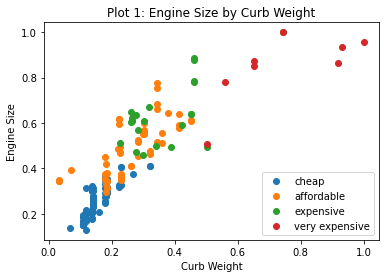

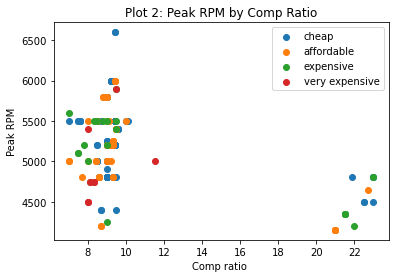

In [19]:
import matplotlib.pyplot as plt
import numpy as np

################################################
# Your answer to Question 6 (2) STARTS HERE
################################################
x = train_features
y = train_labels
curb_weight_instances = list(map(lambda x:x[16],x))
engine_size_instances = list(map(lambda x:x[13],x))
compression_ratio_instances = list(map(lambda x:x[20],x))
peak_rpm_instances = list(map(lambda x:x[22],x))

classes = list(set(y))
curb_weight_by_cls =[[] for i in range(len(classes))]
engine_size_by_cls = [[] for i in range(len(classes))]
compression_ratio_by_cls =[[] for i in range(len(classes))]
peak_rpm_by_cls =[[] for i in range(len(classes))]

for i in range(len(y)):
    for ci, c in enumerate(classes):
        if y[i] == c:
            curb_weight_by_cls[ci].append(curb_weight_instances[i])
            engine_size_by_cls[ci].append(engine_size_instances[i])
            compression_ratio_by_cls[ci].append(compression_ratio_instances[i])
            peak_rpm_by_cls[ci].append(peak_rpm_instances[i])

for ci, c in enumerate(classes):
    plt.scatter(curb_weight_by_cls[ci], engine_size_by_cls[ci], label=c)
plt.legend()
plt.title("Plot 1: Engine Size by Curb Weight")
plt.xlabel("Curb Weight")
plt.ylabel("Engine Size")
plt.show()

for ci, c in enumerate(classes):
    plt.scatter(compression_ratio_by_cls[ci], peak_rpm_by_cls[ci], label=c)
plt.legend()
plt.title("Plot 2: Peak RPM by Comp Ratio")
plt.xlabel("Comp ratio ")
plt.ylabel("Peak RPM")
plt.show()

################################################
# Your answer to Question 6 (2) ENDS HERE
################################################


<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Jason Kang 995465
   
   <b>Dated</b>: 12/08/2022